Importing dataset and libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras 

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Get the data and pre-process it

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def plot_input_img(i):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

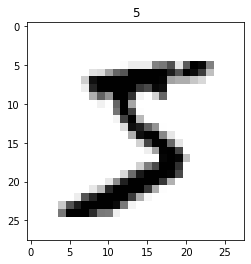

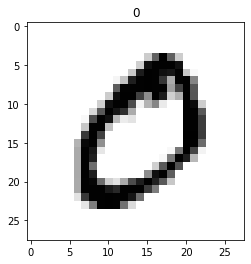

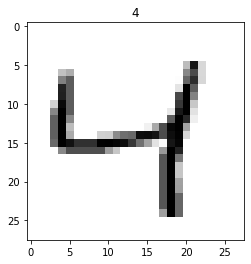

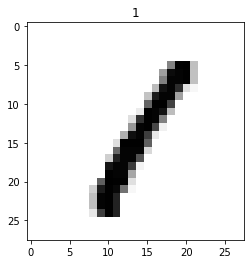

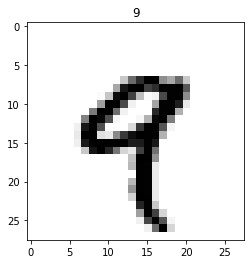

In [ ]:
for i in range(5):
  plot_input_img(i)

Pre-process the images

In [ ]:
# Normalizing the image to [0, 1] range

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Re-shape/Expand dimensions of images to (28, 28, 1) 

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Converting classes to One-Hot Vector

y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

Building the model

In [ ]:
model = Sequential()

# First Convulation Layer

model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(2, 2))

# Second Convolution Layer

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

# Preventing Overfitting

model.add(Dropout(0.25))

# Classification

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor = 'val_acc', min_delta = 0.01, patience = 4, verbose = 1)

# Model Checkpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor = "val_acc", verbose = 1, save_best_only = True)

cb = [es, mc]

Training the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 5, validation_split=0.3, callbacks = cb)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9360

1313/1313 [==============================] - 46s 35ms/step - loss: 0.2115 - accuracy: 0.9360 - val_loss: 0.0827 - val_accuracy: 0.9749
Epoch 2/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9787

1313/1313 [==============================] - 47s 35ms/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.0574 - val_accuracy: 0.9829
Epoch 3/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9845

1313/1313 [==============================] - 46s 35ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0488 - val_accuracy: 0.9854
Epoch 4/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9865

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 5/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9892

1313/1313 [==============================] - 47s 36ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0449 - val_accuracy: 0.9858


In [88]:
model_S = keras.models.load_model('/content/gdrive/MyDrive/Google Colab/Digit Recognition/bestmodel.h5')

In [89]:
score = model_S.evaluate(X_test, y_test)

print(f"Model Accuracy: {score[1]}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0339 - accuracy: 0.9879
Model Accuracy: 0.9879000186920166
